In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Example 1

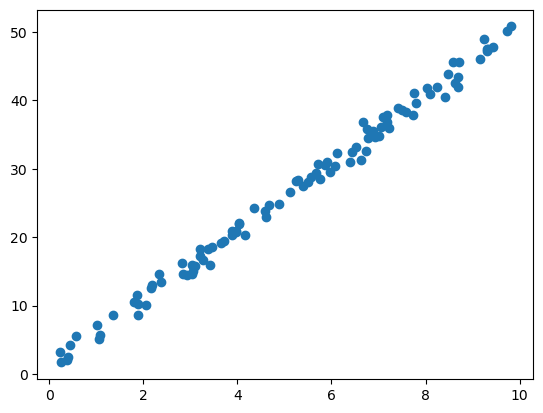

In [122]:
m = 100
x = np.random.uniform(0, 10, m) # m data points sampled from uniform distribution on [0, 10]
y = 5*x+1+np.random.randn(m) # y = 5x+1+noise
plt.scatter(x, y)

In [123]:
from sklearn.tree import DecisionTreeRegressor

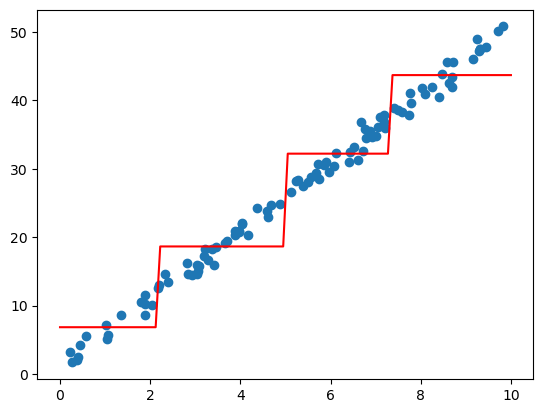

In [124]:
# decision trees (but can we use linear regression?)
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(x.reshape(-1, 1), y) # reshape since x needs to be 2D

# plot data + fitted model
x_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = tree_reg1.predict(x_test)
plt.scatter(x, y)
plt.plot(x_test, y_pred, c='r')

In [125]:
# predictions model1
y_hat1 = tree_reg1.predict(x.reshape(-1, 1))
# residuals model1
r1 = y - y_hat1

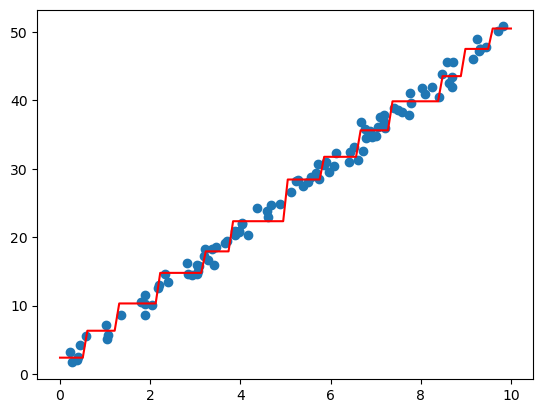

In [126]:
# fit model2 on residuals
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(x.reshape(-1, 1), r1)
# predictions model2
y_hat2 = tree_reg2.predict(x.reshape(-1, 1))
# residuals model2
r2 = r1 - y_hat2

# fit model3 on residuals
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(x.reshape(-1, 1), r2)
# predictions model3
y_hat3 = tree_reg3.predict(x.reshape(-1, 1))
# residuals model3
r3 = r2 - y_hat3

# fit model4 on residuals
tree_reg4 = DecisionTreeRegressor(max_depth=2)
tree_reg4.fit(x.reshape(-1, 1), r3)
# predictions model4
y_hat4 = tree_reg4.predict(x.reshape(-1, 1))
# residuals model4
r4 = r3 - y_hat4

# fit model5 on residuals
tree_reg5 = DecisionTreeRegressor(max_depth=2)
tree_reg5.fit(x.reshape(-1, 1), r4)
# predictions model5
y_hat5 = tree_reg5.predict(x.reshape(-1, 1))

# final boosted model
y_pred = sum([tree.predict(x_test) for tree in (tree_reg1, tree_reg2, tree_reg3, tree_reg4, tree_reg5)])
plt.scatter(x, y)
plt.plot(x_test, y_pred, c='r')

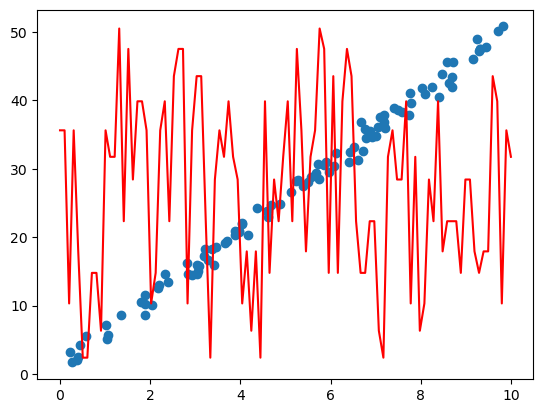

In [127]:
def tree_reg_func(X, y, n_trees):
    X = X.reshape(-1, 1)
    y = y.copy()
    trees = []

    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=2)
        tree.fit(X, y)
        trees.append(tree)
        y = y - tree.predict(X)

    # final boosted model
    y_pred = sum([tree.predict(X) for tree in trees])
    return y_pred

y_pred = tree_reg_func(x, y, 5)
plt.scatter(x, y)
plt.plot(x_test, y_pred, c='r')

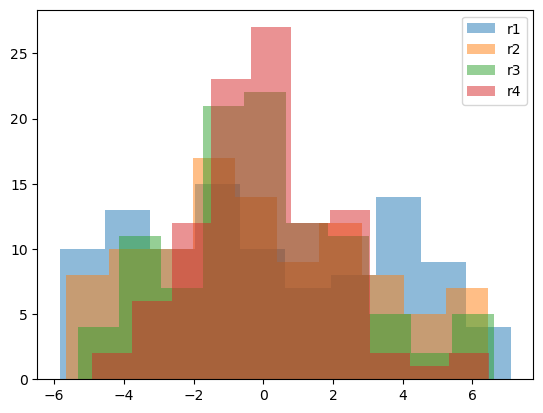

In [128]:
# plot residual distribution for each model
plt.hist(r1, alpha=0.5, label='r1')
plt.hist(r2, alpha=0.5, label='r2')
plt.hist(r3, alpha=0.5, label='r3')
plt.hist(r4, alpha=0.5, label='r4')
plt.legend()
plt.show()

### Example 2

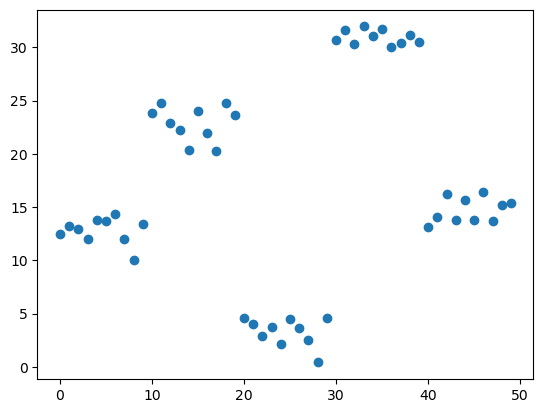

In [129]:
x = np.arange(50)
y1 = np.random.uniform(10, 15, 10)
y2 = np.random.uniform(20, 25, 10)
y3 = np.random.uniform(0, 5, 10)
y4 = np.random.uniform(30, 32, 10)
y5 = np.random.uniform(13, 17, 10)
y = np.concatenate([y1, y2, y3, y4, y5])

plt.scatter(x, y)

In [138]:
x = x.reshape(-1, 1)
r = y.copy()

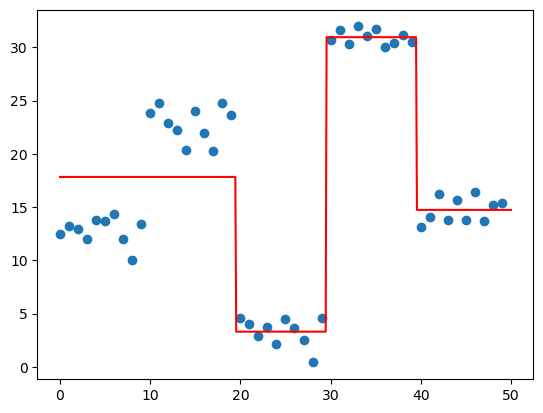

In [139]:
# begin fitting models, showing predictions and line at each step (5 models)

# model 1
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x, y)
y_pred1 = tree_reg1.predict(x)
x_plot = np.linspace(0, 50, 500).reshape(-1, 1)
y_plot = tree_reg1.predict(x_plot)
r = r - y_pred1
plt.scatter(x, y)
plt.plot(x_plot, y_plot, c='r')
plt.show()

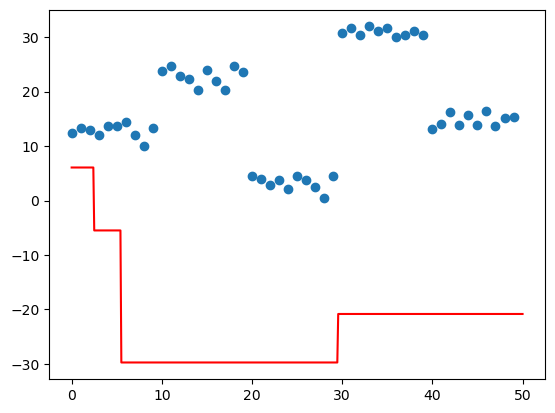

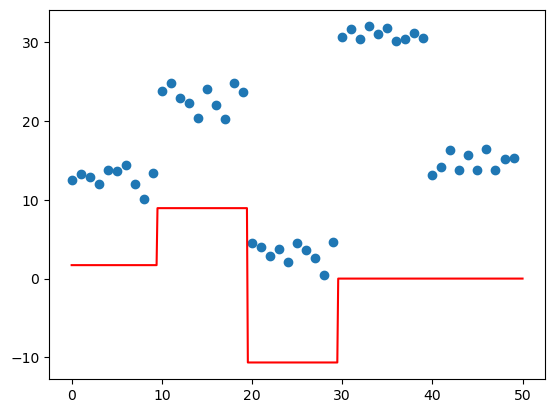

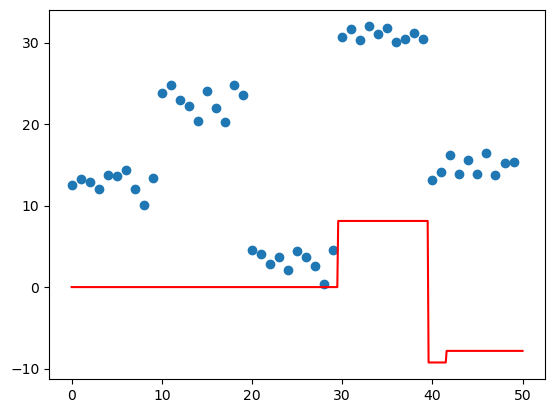

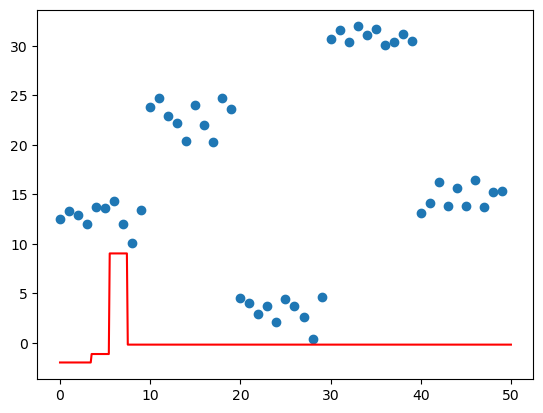

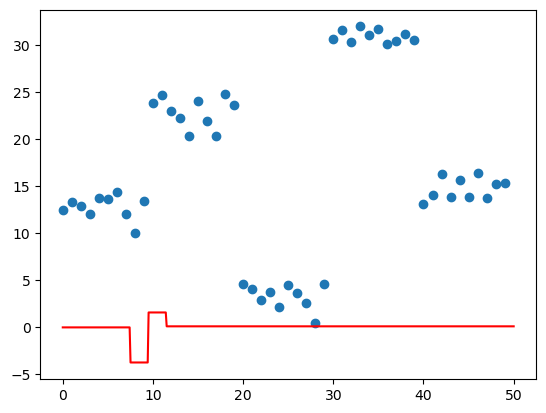

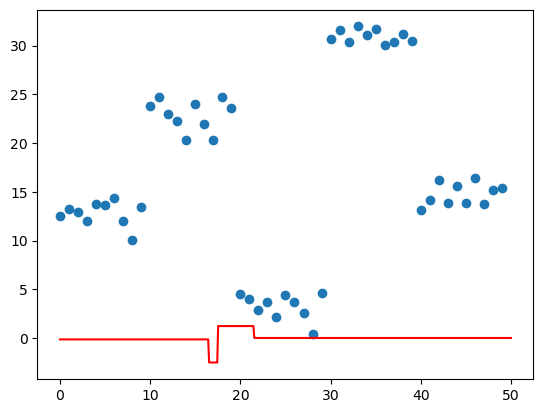

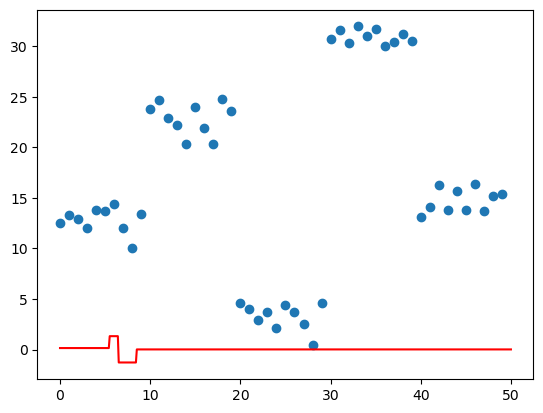

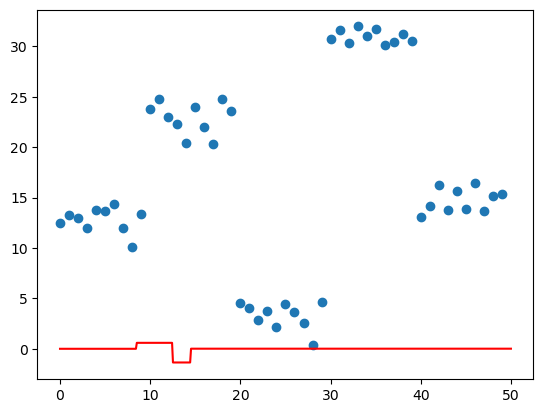

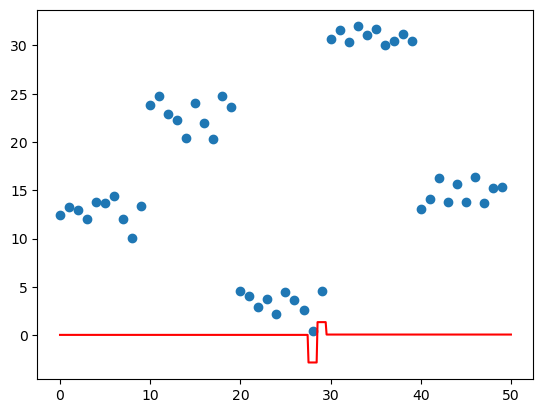

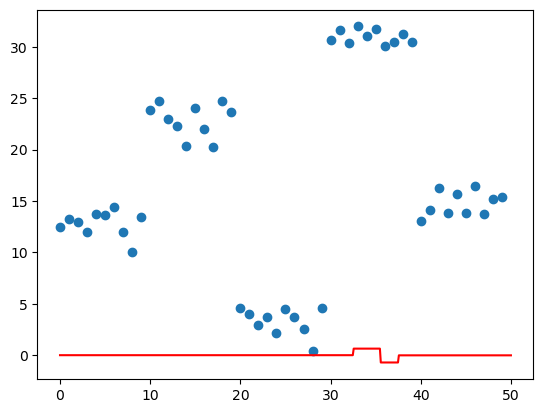

In [132]:
for i in range(10):
    tree_reg = DecisionTreeRegressor(max_depth=2)
    tree_reg.fit(x, r)
    y_pred += tree_reg.predict(x)
    x_plot = np.linspace(0, 50, 500).reshape(-1, 1)
    y_plot += tree_reg.predict(x_plot)
    r = r - y_pred
    plt.scatter(x, y)
    plt.plot(x_plot, y_plot, c='r')
    plt.show()

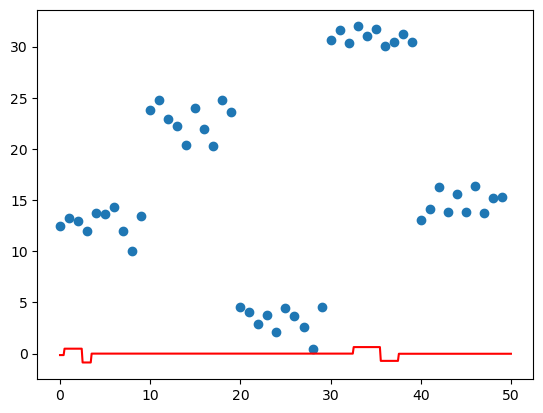

In [133]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x, r)
y_pred += tree_reg.predict(x)
x_plot = np.linspace(0, 50, 500).reshape(-1, 1)
y_plot += tree_reg.predict(x_plot)
r = r - y_pred
plt.scatter(x, y)
plt.plot(x_plot, y_plot, c='r')
plt.show()